<a href="https://colab.research.google.com/github/stellagerantoni/MLChallenge/blob/main/traffic_lights_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, balanced_accuracy_score, log_loss

In [ ]:
!unzip "/content/drive/MyDrive/GTSRB-Training_fixed" -d "/content/"

In [ ]:
import random as python_random
def reset_seeds(seed_value=39):
    # ref: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    # necessary for starting Numpy generated random numbers in a well-defined initial state.
    np.random.seed(seed_value)
    # necessary for starting core Python generated random numbers in a well-defined state.
    python_random.seed(seed_value)
    # set_seed() will make random number generation
    tf.random.set_seed(seed_value)

RANDOM_STATE = 39

In [ ]:
#import zipfile
#import csv

train_images = []
train_labels = []
validation_images = []
validation_labels = []
test_images = []
test_labels = []
annotations=[]

In [ ]:
# Importing the training data, its labels and the x,y values to cut the images and keep only the object we want the model to detect

root_folder = '/content/GTSRB/Training/'
dir_list_classes = sorted(os.listdir(root_folder))
for path in dir_list_classes[0:43]:
  dir_list_images = sorted(os.listdir(os.path.join(root_folder,path)))
  annotation = pd.read_csv(os.path.join(root_folder,path,dir_list_images[-1]),delimiter = ';')
  img_nb = 0
  for file in dir_list_images[:150]:
    img_path = os.path.join(root_folder,path)
    img = cv2.imread(os.path.join(img_path, file))

    x1 = annotation.loc[img_nb,'Roi.X1']
    y1 = annotation.loc[img_nb,'Roi.Y1']
    x2 = annotation.loc[img_nb,'Roi.X2']
    y2 = annotation.loc[img_nb,'Roi.Y2']

    cropped_img = img[y1:y2, x1:x2]

    resized_img = cv2.resize(cropped_img, (100, 100))
    train_images.append(resized_img)

    class_id = annotation.loc[img_nb,'ClassId']
    train_labels.append(class_id)
    img_nb +=1

In [ ]:
# Importing the testing data, its labels and the x,y values to cut the images and keep only the object we want the model to detect

root_folder_test = '/content/drive/MyDrive/Classroom/Final_Test/Images'
root_folder_test_dir = sorted(os.listdir(root_folder_test))
annotation_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GT-final_test.csv',delimiter = ';')
img_idx = 0
for path in root_folder_test_dir[0:12629]:
    img_path = os.path.join(root_folder_test,path)
    img = cv2.imread(img_path)

    x1 = annotation_test.loc[img_idx,'Roi.X1']
    y1 = annotation_test.loc[img_idx,'Roi.Y1']
    x2 = annotation_test.loc[img_idx,'Roi.X2']
    y2 = annotation_test.loc[img_idx,'Roi.Y2']

    cropped_img = img[y1:y2, x1:x2]
    resized_img = cv2.resize(cropped_img, (100, 100))

    class_id_test = annotation_test.loc[img_idx,'ClassId']
    test_labels.append(class_id_test)

    test_images.append(resized_img)
    img_idx +=1

In [ ]:
#shuffling the training data (testing data is already in no purticular order), and spliting the training data so that 20% becomes validation data.

from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=RANDOM_STATE)

from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [ ]:
#converting everything to a numpy array and normalizing the images so that all the values of the pixels are from 0 to 1.

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

train_images = train_images/255.0
test_images = test_images/255.0
validation_images = validation_images/255.0

In [ ]:
#transforming the labels so that they are in a one hot encoding form for the model.
from keras.utils import to_categorical

train_labels_categorical = to_categorical(train_labels, num_classes = 43)
validation_labels_categorical = to_categorical(validation_labels, num_classes = 43)
test_labels_categorical = to_categorical(test_labels, num_classes = 43)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras

In [17]:
model_6 = tf.keras.Sequential([
    (Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape = (100,100,3))),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(64,kernel_size=(3,3), activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(128, kernel_size = (3,3), activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(256, kernel_size = (3,3), activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Flatten()),
    (Dense(256, activation= 'relu')),
    (Dropout(0.5)),
    (Dense(43, activation = 'softmax'))
])

Epoch 1/64
41/41 [==============================] - 4s 58ms/step - loss: 0.0130 - accuracy: 0.9953 - val_loss: 0.0342 - val_accuracy: 0.9961
Epoch 2/64
41/41 [==============================] - 2s 40ms/step - loss: 0.0306 - accuracy: 0.9930 - val_loss: 0.0898 - val_accuracy: 0.9884
Epoch 3/64
41/41 [==============================] - 2s 40ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.0346 - val_accuracy: 0.9930
Epoch 4/64
41/41 [==============================] - 2s 40ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0758 - val_accuracy: 0.9891
Epoch 5/64
41/41 [==============================] - 2s 41ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 6/64
41/41 [==============================] - 2s 41ms/step - loss: 0.0205 - accuracy: 0.9963 - val_loss: 0.0143 - val_accuracy: 0.9961
Epoch 7/64
41/41 [==============================] - 2s 41ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.0276 - val_accuracy: 0.9969
Epoch 8/64
41

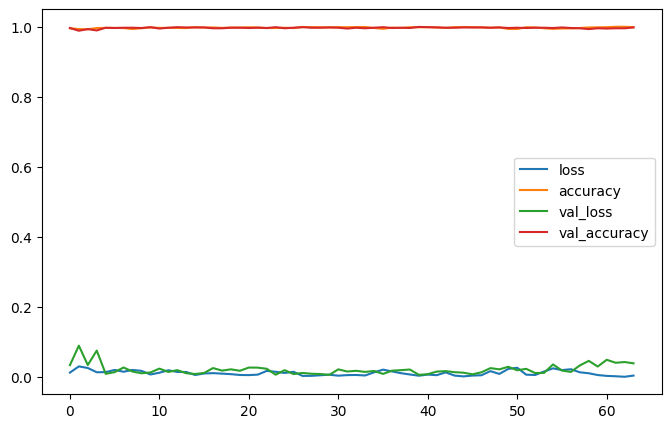

In [19]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_6.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_accuracy = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=30, restore_best_weights=True
)
reset_seeds()
classifier_history_6= model_6.fit(
    train_images,
    train_labels_categorical,
    epochs=64,
    batch_size=128,
    shuffle=True,
    verbose=True,
    validation_data=(validation_images, validation_labels_categorical),
    callbacks=[early_stopping_accuracy],
)
y_pred = model_6.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = balanced_accuracy_score(y_true=test_labels, y_pred=y_pred_classes)
test_loss = log_loss(test_labels,y_pred)
print(f"Classifier trained, with testing accuracy {acc}.")
pd.DataFrame(classifier_history_6.history).plot(figsize=(8,5))
plt.show()

#Adding noise to the test images.

In [85]:
#Generating the noise

s = 0.1
mean = 0
std = 1
normal_distribution = np.random.normal(0, 1, (100,100,3))
noise = normal_distribution * s

In [86]:
#getting the min and max values of the noise (so we can normalize it between 0,1)

max_values = np.max(noise, axis=(0,1))
min_values = np.min(noise, axis=(0,1))
print(f"Max values = {max_values}. Min values = {min_values}")
max_value = np.max(max_values, axis=(0))
min_value = np.min(min_values, axis=(0))
print(f"Max value = {max_value}. Min value= {min_value}")

Max values = [0.39097834 0.34213689 0.3653064 ]. Min values = [-0.36042466 -0.37119832 -0.38075412]
Max value = 0.3909783390439143. Min value= -0.3807541206576778


In [87]:
#just checking the equation

new_max = 1
new_min = 0
min_data = (min_value - min_value) / (max_value - min_value)
max_data = (max_value - min_value) / (max_value - min_value)
print(f'new max value = {max_data}, new min value = {min_data}')

new max value = 1.0, new min value = 0.0


In [88]:
#scaling the noise from 0 to 1

scaled_noise = (noise-min_value) / (max_value - min_value)

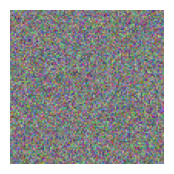

In [89]:
#printing the noise

plt.figure(figsize=(2, 2))
plt.imshow(scaled_noise)
plt.axis('off')
plt.show()

In [90]:
scaled_noise = np.array(scaled_noise)

In [91]:
#putting the noise in the test dataset

noisy_images = []
for img in test_images:
  noisy_image = cv2.add(img,scaled_noise)
  noisy_images.append(noisy_image)

In [92]:
noisy_images = np.array(noisy_images)
noisy_images.shape

(12629, 100, 100, 3)

In [93]:
#again checking the max and min to scale

max_values = np.max(noisy_images, axis=(0,1))
min_values = np.min(noisy_images, axis=(0,1))
max_value = np.max(max_values, axis=(0,1))
min_value = np.min(min_values, axis=(0,1))
print(f"Max value = {max_value}. Min value= {min_value}")

Max value = 2.0. Min value= 0.0


In [94]:
#scaling the new dataset from 0 to 1

new_test_images = (noisy_images-min_value) / (max_value - min_value)

In [95]:
#just ckecking everything went well

max_values = np.max(new_test_images, axis=(0,1))
min_values = np.min(new_test_images, axis=(0,1))
max_value = np.max(max_values, axis=(0,1))
min_value = np.min(min_values, axis=(0,1))
print(f"Max value = {max_value}. Min value= {min_value}")

Max value = 1.0. Min value= 0.0


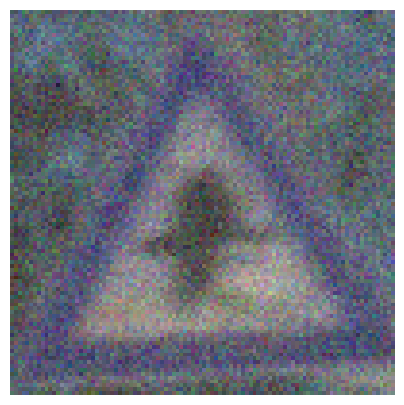

In [96]:
#printing an image with noise

plt.figure(figsize=(5, 5))
plt.imshow(new_test_images[3000])
plt.axis('off')

plt.show()

In [99]:
#getting the accurasy and loss of the model on the noisy dataset

y_pred = model_6.predict(new_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = balanced_accuracy_score(y_true=test_labels, y_pred=y_pred_classes)
test_loss = log_loss(test_labels,y_pred)
print(f"Classifier trained, with testing accuracy {acc}, and loss = {test_loss}.")

395/395 [==============================] - 2s 4ms/step
Classifier trained, with testing accuracy 0.7350222257503995, and loss = 1.2351821412780406.
